## **SCORING - Vitamin E: Workflow 6**
#### **Micha Birklbauer 2021-08-11**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:TYR142B,Hydrogen_Bond:VAL389B,Salt_Bridge:ARG101B,Hydrophobic_Interaction:ASP106B,Hydrogen_Bond:LYS133B,Hydrogen_Bond:GLN129B,Pi-Stacking:PHE393B,Hydrophobic_Interaction:PHE393B,...,Hydrophobic_Interaction:TYR383B,Hydrophobic_Interaction:GLU70B,Salt_Bridge:ARG68B,Hydrophobic_Interaction:THR137B,Hydrophobic_Interaction:VAL389B,Hydrophobic_Interaction:VAL110B,Hydrogen_Bond:ARG112B,Hydrophobic_Interaction:GLU134B,Hydrogen_Bond:GLY105B,LABEL
0,1,101|VitaminE_allmin_active|sdf|101,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,active
1,2,111|VitaminE_allmin_decoy|sdf|111,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,inactive
2,3,98|VitaminE_allmin_decoy|sdf|98,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,0,inactive
3,4,110|VitaminE_allmin_active|sdf|110,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,1,0,active
4,5,120|VitaminE_allmin_decoy|sdf|120,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,114|VitaminE_allmin_active|sdf|114,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,active
85,86,127|VitaminE_allmin_active|sdf|127,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,active
86,87,103|VitaminE_allmin_active|sdf|103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,active
87,88,106|VitaminE_allmin_decoy|sdf|106,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 84) 61


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 84) 15


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 84) 18


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.352459,0.147541,0.500000
1,2,Pi-Cation_Interaction:ARG101B,0.316745,0.147541,0.464286
2,3,Hydrogen_Bond:ARG101B,0.244145,1.065574,0.821429
3,4,Hydrophobic_Interaction:PRO164B,0.204333,0.311475,0.107143
4,5,Hydrophobic_Interaction:VAL110B,0.199063,0.770492,0.571429
...,...,...,...,...,...
76,77,Hydrophobic_Interaction:ASP166B,0.005855,0.065574,0.071429
77,78,Salt_Bridge:LYS394B,0.002927,0.032787,0.035714
78,79,Hydrophobic_Interaction:TYR383B,0.002927,0.032787,0.035714
79,80,Hydrogen_Bond:LYS394B,0.001756,0.180328,0.178571


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.05, 0.05, 0.0: strat4 Accuracy: 0.8764044943820225
Key: 0.05, 0.0, 0.0: strat4 Accuracy: 0.8651685393258427
Key: 0.05, 0.0, 0.0: strat3 Accuracy: 0.8539325842696629
Key: 0.05, 0.05, 0.0: strat3 Accuracy: 0.8314606741573034
Key: 0.05, 0.1, 0.0: strat3 Accuracy: 0.8202247191011236


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.05, 0.0, 0.0: strat3 Area under the ROC curve: 0.8858313817330211
Key: 0.05, 0.0, 0.0: strat4 Area under the ROC curve: 0.8738290398126464
Key: 0.1, 0.0, 0.0: strat3 Area under the ROC curve: 0.8679742388758783
Key: 0.05, 0.0, 0.0: strat1 Area under the ROC curve: 0.8612412177985947
Key: 0.05, 0.05, 0.0: strat1 Area under the ROC curve: 0.8612412177985947


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.15000000000000002: strat3 Accuracy: 0.7391304347826086
Key: 0.0, 0.05, 0.15000000000000002: strat3 Accuracy: 0.7391304347826086
Key: 0.0, 0.1, 0.15000000000000002: strat3 Accuracy: 0.7391304347826086
Key: 0.2, 0.0, 0.0: strat4 Accuracy: 0.7391304347826086
Key: 0.2, 0.0, 0.05: strat4 Accuracy: 0.7391304347826086


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.2: strat1 Area under the ROC curve: 0.6833333333333333
Key: 0.0, 0.05, 0.2: strat1 Area under the ROC curve: 0.6833333333333333
Key: 0.0, 0.1, 0.2: strat1 Area under the ROC curve: 0.6833333333333333
Key: 0.0, 0.15000000000000002, 0.2: strat1 Area under the ROC curve: 0.6833333333333333
Key: 0.0, 0.2, 0.2: strat1 Area under the ROC curve: 0.6833333333333333


In [16]:
features_filtered = get_relevant_features(features, 0.0, 0.1, 0.15000000000000002)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.352459,0.147541,0.500000
1,2,Pi-Cation_Interaction:ARG101B,0.316745,0.147541,0.464286
2,3,Hydrogen_Bond:ARG101B,0.244145,1.065574,0.821429
4,5,Hydrophobic_Interaction:VAL110B,0.199063,0.770492,0.571429
5,6,Hydrophobic_Interaction:LYS133B,0.185597,0.721311,0.535714
9,10,Hydrogen_Bond:GLU108B,0.116511,0.295082,0.178571
11,12,Hydrophobic_Interaction:GLU108B,0.097775,0.295082,0.392857
12,13,Hydrogen_Bond:HIS130B,0.091920,0.229508,0.321429
18,19,Hydrophobic_Interaction:VAL389B,0.067330,0.245902,0.178571
28,29,Hydrophobic_Interaction:GLU134B,0.053864,0.803279,0.857143


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrogen_Bond:ARG101B',
 'Hydrophobic_Interaction:VAL110B',
 'Hydrophobic_Interaction:LYS133B',
 'Hydrogen_Bond:GLU108B',
 'Hydrophobic_Interaction:VAL389B',
 'Hydrophobic_Interaction:VAL109B',
 'Hydrophobic_Interaction:GLN129B',
 'Hydrophobic_Interaction:VAL107B',
 'Hydrogen_Bond:ARG165B',
 'Hydrophobic_Interaction:HIS130B',
 'Hydrophobic_Interaction:LEU66B',
 'Hydrogen_Bond:LYS394B',
 'Hydrophobic_Interaction:ALA388B']

In [20]:
negatives

['Hydrogen_Bond:ARG138B',
 'Pi-Cation_Interaction:ARG101B',
 'Hydrophobic_Interaction:GLU108B',
 'Hydrogen_Bond:HIS130B',
 'Hydrophobic_Interaction:GLU134B',
 'Hydrogen_Bond:ASP166B',
 'Hydrophobic_Interaction:TYR142B',
 'Hydrophobic_Interaction:THR137B',
 'Hydrophobic_Interaction:ILE126B',
 'Hydrophobic_Interaction:ARG112B',
 'Hydrophobic_Interaction:GLN141B',
 'Hydrogen_Bond:ARG112B']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [4, 0.6966292134831461] 
Strategy 2:  [4, 0.7191011235955056] 
Strategy 3:  [-1, 0.7528089887640449] 
Strategy 4:  [-1, 0.7640449438202247]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -1, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -1, "accuracy")
)

Strategy 1:  0.6966292134831461 
Strategy 2:  0.7191011235955056 
Strategy 3:  0.7528089887640449 
Strategy 4:  0.7640449438202247


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -1, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -1, "fpr")
)

Strategy 1:  0.8214285714285714 
Strategy 2:  0.8214285714285714 
Strategy 3:  0.7142857142857143 
Strategy 4:  0.6785714285714286


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, -1, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -1, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6966292134831461, 'FPR': 0.8214285714285714, 'AUC': 0.6370023419203746, 'Ya': 0.7125, 'EF': 1.039549180327869, 'REF': 93.44262295081967} 
Strategy 2:  {'ACC': 0.7191011235955056, 'FPR': 0.8214285714285714, 'AUC': 0.647248243559719, 'Ya': 0.7195121951219512, 'EF': 1.049780087964814, 'REF': 96.72131147540983} 
Strategy 3:  {'ACC': 0.7528089887640449, 'FPR': 0.7142857142857143, 'AUC': 0.6896955503512882, 'Ya': 0.7468354430379747, 'EF': 1.0896451545963892, 'REF': 96.72131147540983} 
Strategy 4:  {'ACC': 0.7640449438202247, 'FPR': 0.6785714285714286, 'AUC': 0.6920374707259953, 'Ya': 0.7564102564102564, 'EF': 1.1036149642707018, 'REF': 96.72131147540983}


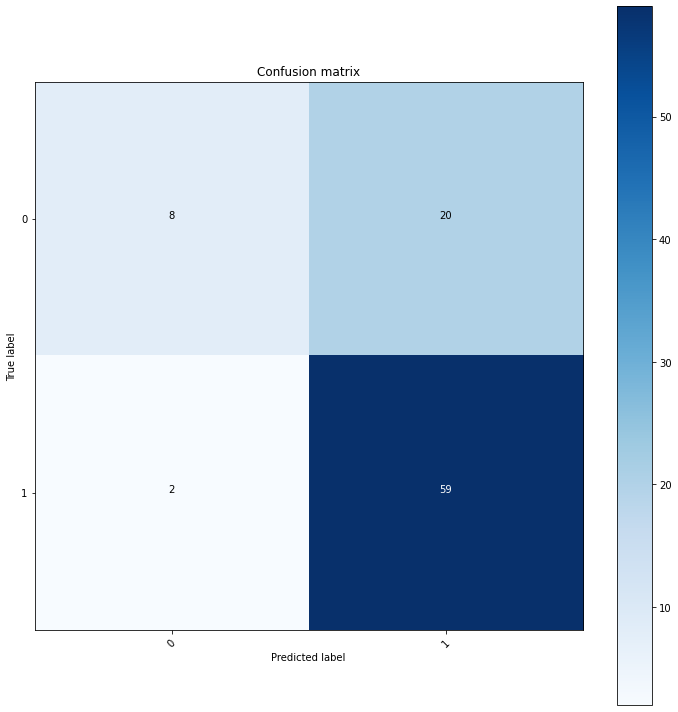

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, -1)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

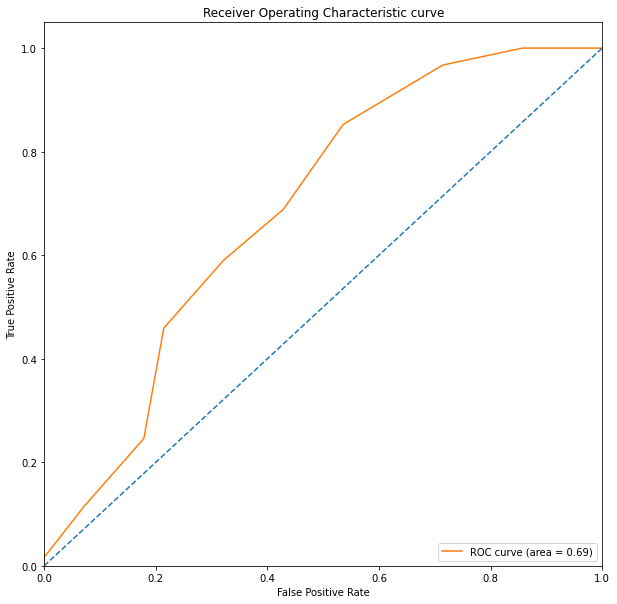

In [29]:
roc = get_metrics(train_result_strat3, -1)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, -1, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -1, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6521739130434783, 'FPR': 0.75, 'AUC': 0.6208333333333333, 'Ya': 0.6842105263157895, 'EF': 1.0491228070175438, 'REF': 86.66666666666667} 
Strategy 2:  {'ACC': 0.6521739130434783, 'FPR': 0.75, 'AUC': 0.5666666666666667, 'Ya': 0.6842105263157895, 'EF': 1.0491228070175438, 'REF': 86.66666666666667} 
Strategy 3:  {'ACC': 0.7391304347826086, 'FPR': 0.625, 'AUC': 0.5958333333333333, 'Ya': 0.7368421052631579, 'EF': 1.1298245614035087, 'REF': 93.33333333333333} 
Strategy 4:  {'ACC': 0.6956521739130435, 'FPR': 0.625, 'AUC': 0.5375000000000001, 'Ya': 0.7222222222222222, 'EF': 1.1074074074074074, 'REF': 86.66666666666667}


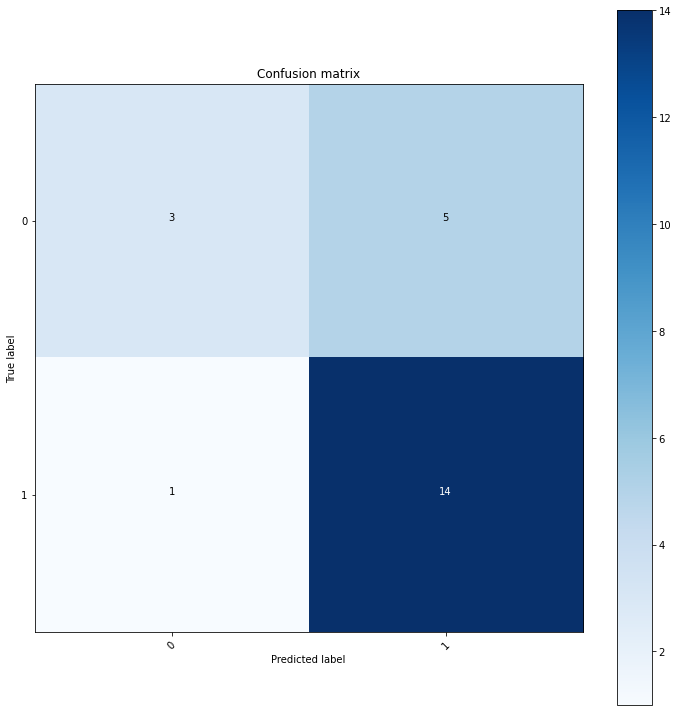

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat3, -1)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

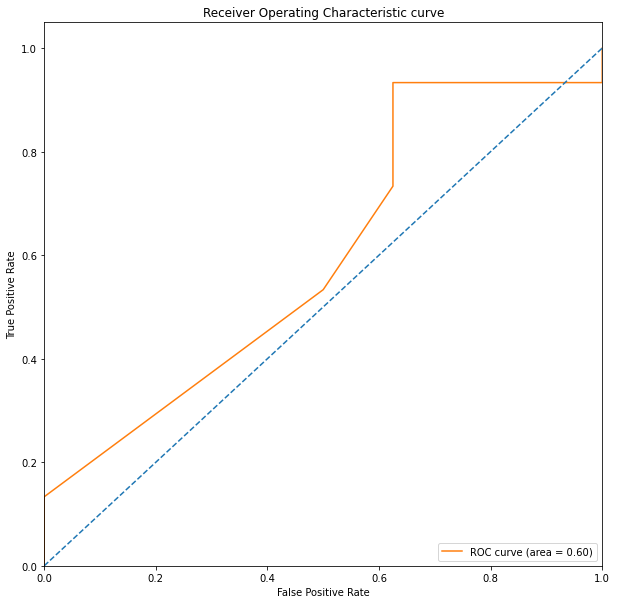

In [32]:
roc = get_metrics(val_result_strat3, -1)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, -1, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -1, pretty_print = True)
)

Strategy 1:  {'ACC': 0.5517241379310345, 'FPR': 0.7272727272727273, 'AUC': 0.6439393939393939, 'Ya': 0.6190476190476191, 'EF': 0.9973544973544973, 'REF': 72.22222222222223} 
Strategy 2:  {'ACC': 0.5172413793103449, 'FPR': 0.9090909090909091, 'AUC': 0.601010101010101, 'Ya': 0.5833333333333334, 'EF': 0.9398148148148149, 'REF': 77.77777777777777} 
Strategy 3:  {'ACC': 0.4827586206896552, 'FPR': 0.9090909090909091, 'AUC': 0.5883838383838383, 'Ya': 0.5652173913043478, 'EF': 0.9106280193236714, 'REF': 72.22222222222223} 
Strategy 4:  {'ACC': 0.4482758620689655, 'FPR': 0.9090909090909091, 'AUC': 0.5505050505050505, 'Ya': 0.5454545454545454, 'EF': 0.8787878787878787, 'REF': 66.66666666666667}


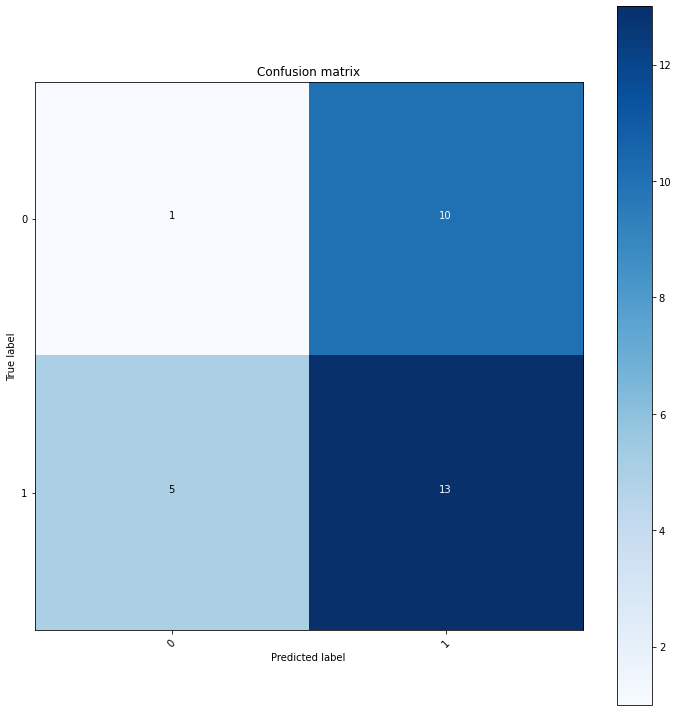

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat3, -1)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

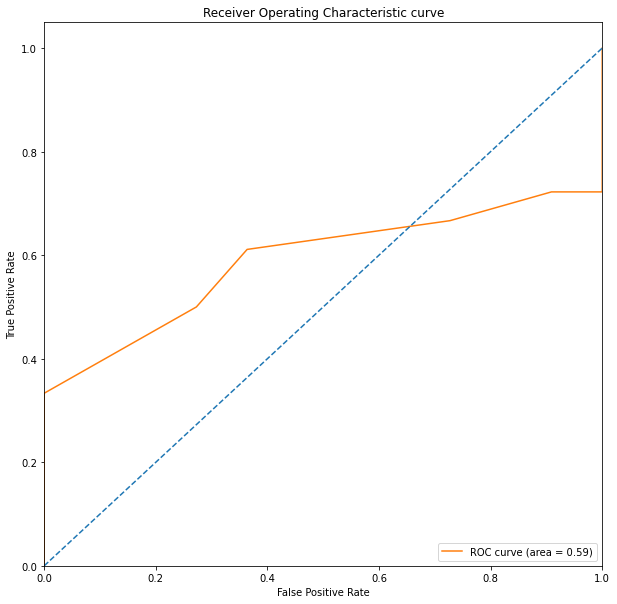

In [35]:
roc = get_metrics(test_result_strat3, -1)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [36]:
os.remove("scoring.py")